# Intro to Pandas

Originally, python was hard to use because of speed. Then, someone had the bright idea to run C but call it in Python. This gave birth to numpy. Numpy is effectively a wrapper (or a container) around C code. Scipy is the algorithm.

Pandas is an interface for data like you have in SQL tables.

In [122]:
import pandas as pd
import datetime as dt
import matplotlib as plt

%matplotlib inline

In [84]:
tasks = {'task_id': ['t1', 't2', 't3', 't4', 't5'],
         'dag_id': ['archive_data', 'archive_data', 'atl', 'atl', 'atl'],
         'duration': [53, 60, 10, 39, 100],
         'job_id': [1, 2, 3, 4, 5],
         'execution_date': ['2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04', '2017-01-02'],
         'start_date': ['2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04', '2017-01-02'],
         'end_date': ['2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04', '2017-01-02']}
#tasks = pd.read_csv()
tasks = pd.DataFrame(tasks)

## Exploring DataFrame

In [85]:
type(tasks)

pandas.core.frame.DataFrame

In [86]:
tasks.shape

(5, 7)

In [87]:
tasks.columns

Index(['dag_id', 'duration', 'end_date', 'execution_date', 'job_id',
       'start_date', 'task_id'],
      dtype='object')

In [88]:
# Object type is because when you're creating a C level array of something, it has to have a data type of a fixed size.
# You end up with python object pointers that, in this case, point to strings.
tasks.dtypes

dag_id            object
duration           int64
end_date          object
execution_date    object
job_id             int64
start_date        object
task_id           object
dtype: object

In [89]:
desc = tasks.describe()

In [90]:
desc['duration']

count      5.000000
mean      52.400000
std       32.791767
min       10.000000
25%       39.000000
50%       53.000000
75%       60.000000
max      100.000000
Name: duration, dtype: float64

In [91]:
desc['duration']['mean']

52.399999999999999

In [92]:
desc[['duration', 'job_id']]

,duration,job_id
count,5.000000,5.000000
mean,52.400000,3.000000
std,32.791767,1.581139
min,10.000000,1.000000
25%,39.000000,2.000000
50%,53.000000,3.000000
75%,60.000000,4.000000
max,100.000000,5.000000


Notice that there is a row index here. We can grab a row using this index. One of the biggest traps is when you are accessing rows vs columns. If you're going to grab a row by it's label, use .loc. This returns a series.

In [93]:
desc.loc['count']

duration    5.0
job_id      5.0
Name: count, dtype: float64

In [94]:
type(desc.loc['count'])

pandas.core.series.Series

In [95]:
desc.loc['count']['duration']

5.0

In [96]:
desc.loc['count', 'duration']

5.0

In [97]:
desc.loc[['mean', 'std', '50%'], 'duration']

mean    52.400000
std     32.791767
50%     53.000000
Name: duration, dtype: float64

If you want to use a positional index, you can use .iloc. For example [0:2] extracts the first 2 rows.

In [98]:
desc.iloc[0:2]

,duration,job_id
count,5.0,5.0
mean,52.4,3.0


In [99]:
tasks.head(4)

,dag_id,duration,end_date,execution_date,job_id,start_date,task_id
0,archive_data,53,2016-12-01,2016-12-01,1,2016-12-01,t1
1,archive_data,60,2016-12-02,2016-12-02,2,2016-12-02,t2
2,atl,10,2016-12-03,2016-12-03,3,2016-12-03,t3
3,atl,39,2016-12-04,2016-12-04,4,2016-12-04,t4


In [100]:
tasks.execution_date = pd.to_datetime(tasks.execution_date)
tasks.start_date = pd.to_datetime(tasks.start_date)
tasks.end_date = pd.to_datetime(tasks.end_date)

In [101]:
tasks.dtypes

dag_id                    object
duration                   int64
end_date          datetime64[ns]
execution_date    datetime64[ns]
job_id                     int64
start_date        datetime64[ns]
task_id                   object
dtype: object

In [102]:
tasks.start_date.min()

Timestamp('2016-12-01 00:00:00')

## Filtering Rows
There's a useful concept in pandas called broadcasting. Pandas can compare each value of a series to a particular constant. This can be used to filter rows

In [103]:
tasks.loc[tasks.start_date == tasks.start_date.min()]

,dag_id,duration,end_date,execution_date,job_id,start_date,task_id
0,archive_data,53,2016-12-01,2016-12-01,1,2016-12-01,t1


In [106]:
dec = tasks.loc[
    (tasks.start_date >= dt.datetime(2016, 12, 1)) &
    (tasks.start_date < dt.datetime(2017, 1, 1))
]

In [108]:
dec.shape

(4, 7)

In [110]:
tasks.query('dag_id == "atl" and task_id == "t3"')

,dag_id,duration,end_date,execution_date,job_id,start_date,task_id
2,atl,10,2016-12-03,2016-12-03,3,2016-12-03,t3


You can also time tasks

In [113]:
%%timeit
tasks.loc[
    (tasks.dag_id == 'atl') & (tasks.task_id == 'atl_is_done')
]

1000 loops, best of 3: 968 µs per loop


In [112]:
%%timeit
tasks.query('dag_id == "atl" and task_id == "atl_is_done"')

100 loops, best of 3: 1.74 ms per loop


In [114]:
tasks.loc[tasks.dag_id.str.contains('atl')]

,dag_id,duration,end_date,execution_date,job_id,start_date,task_id
2,atl,10,2016-12-03,2016-12-03,3,2016-12-03,t3
3,atl,39,2016-12-04,2016-12-04,4,2016-12-04,t4
4,atl,100,2017-01-02,2017-01-02,5,2017-01-02,t5


## Group By Method

In [115]:
gb = tasks.groupby('dag_id')

In [116]:
gb

In [118]:
for group, df in gb:
    print(group)
    print(df)

archive_data
         dag_id  duration   end_date execution_date  job_id start_date task_id
0  archive_data        53 2016-12-01     2016-12-01       1 2016-12-01      t1
1  archive_data        60 2016-12-02     2016-12-02       2 2016-12-02      t2
atl
  dag_id  duration   end_date execution_date  job_id start_date task_id
2    atl        10 2016-12-03     2016-12-03       3 2016-12-03      t3
3    atl        39 2016-12-04     2016-12-04       4 2016-12-04      t4
4    atl       100 2017-01-02     2017-01-02       5 2017-01-02      t5


In [120]:
# Aggregation statistics in pandas always ignores NaN's
gb.duration.mean()

dag_id
archive_data    56.500000
atl             49.666667
Name: duration, dtype: float64

In [121]:
gb.duration.mean().sort_values(ascending=False)

dag_id
archive_data    56.500000
atl             49.666667
Name: duration, dtype: float64

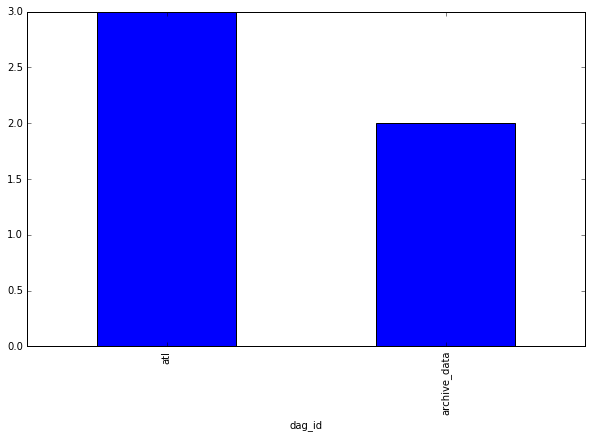

In [124]:
# Size is counting rows in the group (similar to count aggregate function in SQL)
gb.size().sort_values(ascending=False).iloc[:20].plot.bar(figsize=(10, 6))

In [126]:
tasks.resample('1M', on='start_date').size().plot.line()

TypeError: resample() got an unexpected keyword argument 'on'